In [1]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import warnings

# Ignore all warnings
warnings.filterwarnings('ignore')


# Code Explanation

## Importing Libraries

### `import numpy as np`

**Numpy** is a fundamental library for numerical computations in Python. It provides support for arrays, matrices, and many mathematical functions.

### `import seaborn as sns`

**Seaborn** is a statistical data visualization library based on Matplotlib. It provides an interface for creating informative and attractive visualizations.

### `import pandas as pd`

**Pandas** is a powerful data manipulation and analysis library. It provides data structures like DataFrames and Series, which are essential for data analysis tasks.

### `import matplotlib.pyplot as plt`

**Matplotlib** is a plotting library used for creating static, animated, and interactive visualizations in Python. The `pyplot` module provides a MATLAB-like interface for plotting.

### `import warnings`

**Warnings** is a module used to handle warning messages. It allows you to filter and control warnings issued during code execution.

## Ignoring Warnings

```python
# Ignore all warnings
warnings.filterwarnings('ignore')


In [2]:
df = pd.read_csv("housing.csv")

In [3]:
df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [5]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split

### Checking The Missing Values In The Dataset..

In [6]:
# Checking for missing values
print("Missing values in the dataset:")
print(df.isnull().sum())

Missing values in the dataset:
longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64


# Explanation of Missing Values in the Dataset

## Missing Values Summary

The following summary provides information about missing values in each column of the dataset:

### `longitude`: 0 missing values

- **Description**: The `longitude` column represents the geographic longitude of the location.
- **Explanation**: There are no missing values in this column, meaning all entries have valid longitude data.

### `latitude`: 0 missing values

- **Description**: The `latitude` column represents the geographic latitude of the location.
- **Explanation**: There are no missing values in this column, indicating that all entries have valid latitude data.

### `housing_median_age`: 0 missing values

- **Description**: The `housing_median_age` column indicates the median age of the houses in the neighborhood.
- **Explanation**: No missing values are found in this column, so all records have information about the median age of housing.

### `total_rooms`: 0 missing values

- **Description**: The `total_rooms` column represents the total number of rooms in the house.
- **Explanation**: This column has no missing values, meaning every entry includes the total room count.

### `total_bedrooms`: 207 missing values

- **Description**: The `total_bedrooms` column indicates the total number of bedrooms in the house.
- **Explanation**: There are 207 missing values in this column. This indicates that for 207 records, the number of bedrooms is not provided.

### `population`: 0 missing values

- **Description**: The `population` column represents the total number of people living in the area.
- **Explanation**: There are no missing values in this column, so all entries have population data.

### `households`: 0 missing values

- **Description**: The `households` column shows the total number of households in the area.
- **Explanation**: This column has no missing values, meaning every record includes the number of households.

### `median_income`: 0 missing values

- **Description**: The `median_income` column represents the median income of households in the area.
- **Explanation**: There are no missing values, indicating that the median income data is complete for all records.

### `median_house_value`: 0 missing values

- **Description**: The `median_house_value` column shows the median house value in the area.
- **Explanation**: This column is complete with no missing values, so all records have information about the median house value.

### `ocean_proximity`: 0 missing values

- **Description**: The `ocean_proximity` column indicates the proximity of the location to the ocean (e.g., "NEAR BAY", "INLAND").
- **Explanation**: No missing values are present in this column, meaning that proximity to the ocean is specified for all records.

## Summary

In summary, the dataset has missing values only in the `total_bedrooms` column, with 207 records missing this information. All other columns have complete data with no missing values.


In [7]:
# Fill missing values in 'total_bedrooms' with the median of the column
median_total_bedrooms = df['total_bedrooms'].median()
df['total_bedrooms'].fillna(median_total_bedrooms, inplace=True)

# Check if there are still any missing values
print("\nMissing values after filling:")
print(df.isnull().sum())



Missing values after filling:
longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64


In [8]:
# List of columns to check for outliers
numeric_columns = ['longitude', 'latitude', 'housing_median_age', 'total_rooms', 
                   'total_bedrooms', 'population', 'households', 'median_income', 'median_house_value']

# Detect outliers using Z-score method
def detect_outliers_zscore(data, column, threshold=3):
    # Calculate Z-scores for the column
    z_scores = (data[column] - data[column].mean()) / data[column].std()

    # Identify outliers as points where the absolute Z-score is above the threshold
    outliers = data[np.abs(z_scores) > threshold]

    return outliers

# Detect and print outliers for each numeric column using Z-score
for column in numeric_columns:
    outliers = detect_outliers_zscore(df, column)
    print(f"Outliers detected in {column} using Z-score:")
    print(outliers)
    print("\n")

Outliers detected in longitude using Z-score:
Empty DataFrame
Columns: [longitude, latitude, housing_median_age, total_rooms, total_bedrooms, population, households, median_income, median_house_value, ocean_proximity]
Index: []


Outliers detected in latitude using Z-score:
Empty DataFrame
Columns: [longitude, latitude, housing_median_age, total_rooms, total_bedrooms, population, households, median_income, median_house_value, ocean_proximity]
Index: []


Outliers detected in housing_median_age using Z-score:
Empty DataFrame
Columns: [longitude, latitude, housing_median_age, total_rooms, total_bedrooms, population, households, median_income, median_house_value, ocean_proximity]
Index: []


Outliers detected in total_rooms using Z-score:
       longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
283      -122.16     37.79                22.0      12842.0          2048.0   
570      -122.24     37.72                 5.0      18634.0          2885.0   
576      -122.06 

# Outlier Detection Using Z-Score

## Overview

This section of code is used to detect outliers in the dataset using the Z-score method. The Z-score method helps in identifying data points that deviate significantly from the mean of a dataset.

## Code Explanation

### List of Columns to Check for Outliers

```python
# List of columns to check for outliers
numeric_columns = ['longitude', 'latitude', 'housing_median_age', 'total_rooms', 
                   'total_bedrooms', 'population', 'households', 'median_income', 'median_house_value']


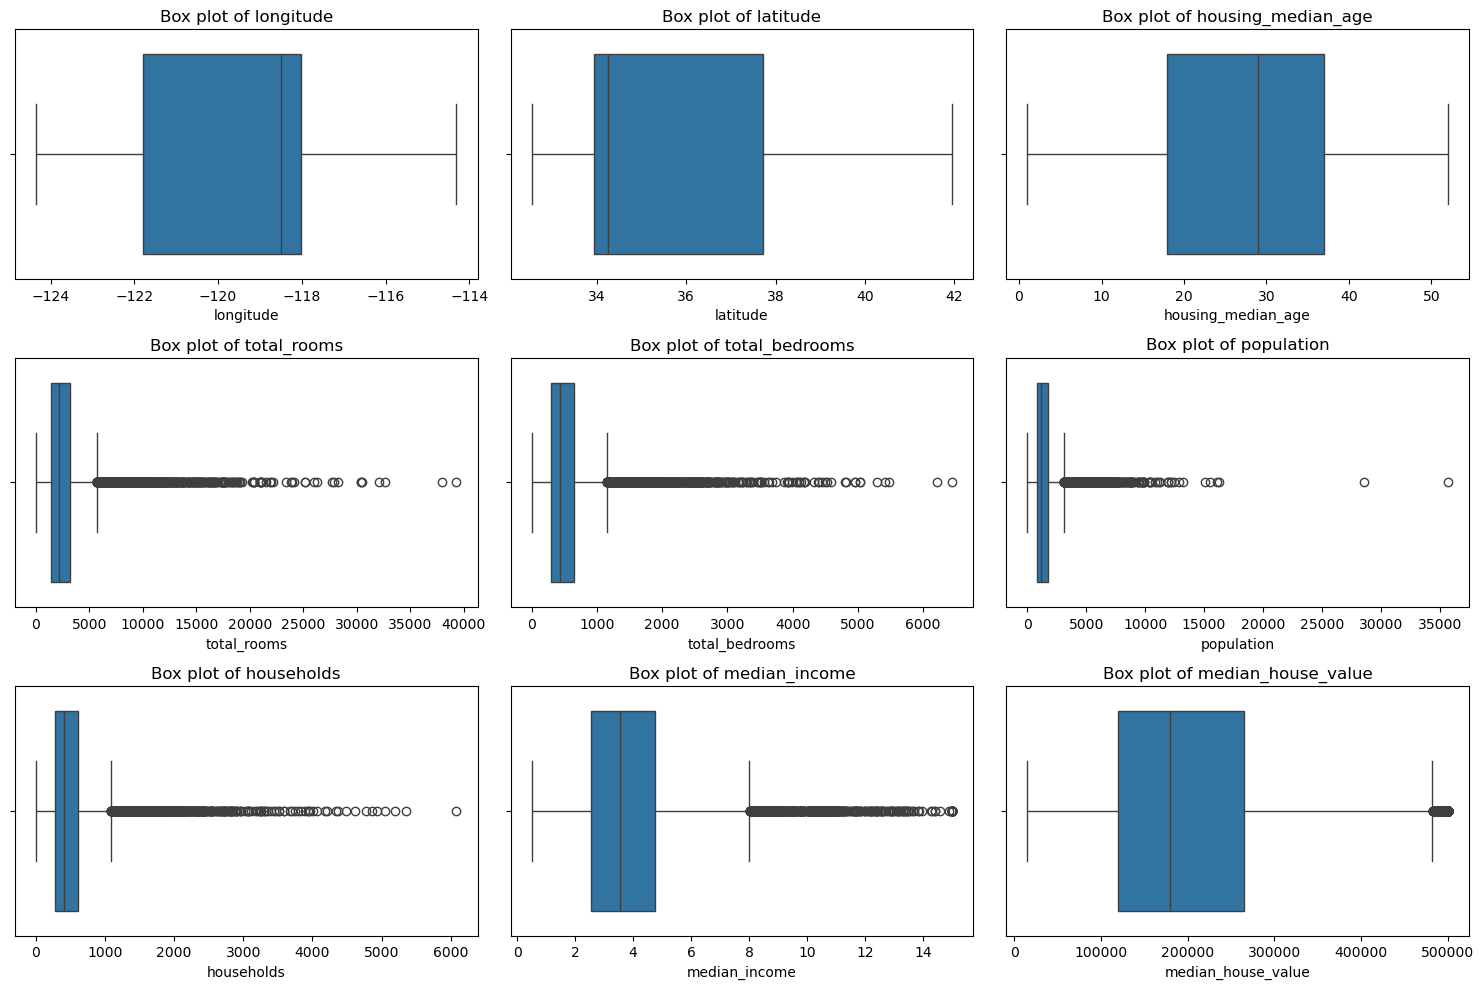

In [9]:
# Visualize the outliers using box plots
plt.figure(figsize=(15, 10))
for i, column in enumerate(numeric_columns, 1):
    plt.subplot(3, 3, i)
    sns.boxplot(x=df[column])
    plt.title(f'Box plot of {column}')

plt.tight_layout()
plt.show()

In [10]:
# Function to remove outliers using Z-score method
def remove_outliers_zscore(data, columns, threshold=3):
    data_clean = data.copy()
    for column in columns:
        # Calculate Z-scores for the column
        z_scores = (data_clean[column] - data_clean[column].mean()) / data_clean[column].std()

        # Remove rows where absolute Z-score is greater than the threshold
        data_clean = data_clean[np.abs(z_scores) <= threshold]
    return data_clean

# Remove outliers from the dataset
df_cleaned = remove_outliers_zscore(df, numeric_columns)

In [11]:
# Print the shape of the dataset before and after removing outliers
print(f"Original dataset shape: {df.shape}")
print(f"Cleaned dataset shape: {df_cleaned.shape}")

Original dataset shape: (20640, 10)
Cleaned dataset shape: (19086, 10)


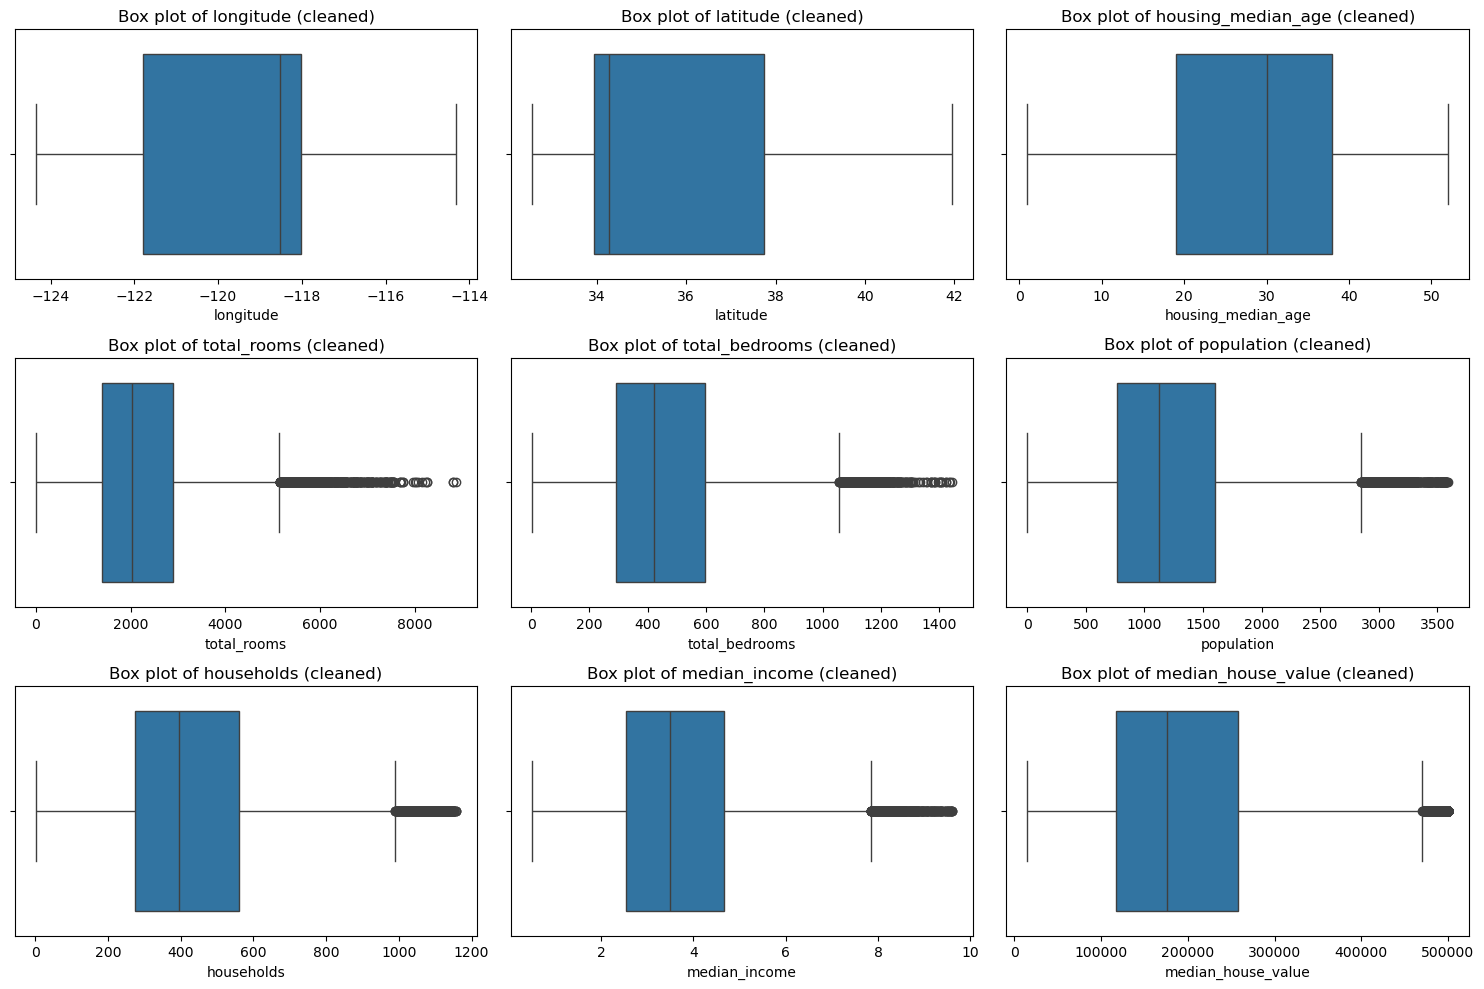

In [12]:
# Visualize the cleaned data using box plots
plt.figure(figsize=(15, 10))
for i, column in enumerate(numeric_columns, 1):
    plt.subplot(3, 3, i)
    sns.boxplot(x=df_cleaned[column])
    plt.title(f'Box plot of {column} (cleaned)')

plt.tight_layout()
plt.show()

In [13]:
df_cleaned

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


In [14]:
# Display basic information about the dataset
print("Basic Information about the Dataset:")
print(df_cleaned.info())

Basic Information about the Dataset:
<class 'pandas.core.frame.DataFrame'>
Index: 19086 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           19086 non-null  float64
 1   latitude            19086 non-null  float64
 2   housing_median_age  19086 non-null  float64
 3   total_rooms         19086 non-null  float64
 4   total_bedrooms      19086 non-null  float64
 5   population          19086 non-null  float64
 6   households          19086 non-null  float64
 7   median_income       19086 non-null  float64
 8   median_house_value  19086 non-null  float64
 9   ocean_proximity     19086 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB
None


In [15]:
# Display the first few rows of the cleaned dataset
print("\nFirst 5 rows of the cleaned dataset:")
print(df_cleaned.head())


First 5 rows of the cleaned dataset:
   longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                41.0        880.0           129.0   
1    -122.22     37.86                21.0       7099.0          1106.0   
2    -122.24     37.85                52.0       1467.0           190.0   
3    -122.25     37.85                52.0       1274.0           235.0   
4    -122.25     37.85                52.0       1627.0           280.0   

   population  households  median_income  median_house_value ocean_proximity  
0       322.0       126.0         8.3252            452600.0        NEAR BAY  
1      2401.0      1138.0         8.3014            358500.0        NEAR BAY  
2       496.0       177.0         7.2574            352100.0        NEAR BAY  
3       558.0       219.0         5.6431            341300.0        NEAR BAY  
4       565.0       259.0         3.8462            342200.0        NEAR BAY  


In [16]:
# Display summary statistics for numerical columns
print("\nSummary statistics for numerical columns:")
print(df_cleaned.describe())


Summary statistics for numerical columns:
          longitude      latitude  housing_median_age   total_rooms  \
count  19086.000000  19086.000000        19086.000000  19086.000000   
mean    -119.593271     35.662253           29.336791   2265.371948   
std        2.004095      2.149646           12.384223   1250.163827   
min     -124.350000     32.540000            1.000000      2.000000   
25%     -121.800000     33.940000           19.000000   1407.000000   
50%     -118.530000     34.270000           30.000000   2037.000000   
75%     -118.020000     37.730000           38.000000   2901.750000   
max     -114.310000     41.950000           52.000000   8874.000000   

       total_bedrooms    population    households  median_income  \
count    19086.000000  19086.000000  19086.000000   19086.000000   
mean       463.972074   1239.088547    433.287279       3.732207   
std        243.207092    663.725679    224.767835       1.613384   
min          2.000000      3.000000      2.00

In [17]:
# Display the number of unique values in each column
print("\nNumber of unique values in each column:")
print(df_cleaned.nunique())



Number of unique values in each column:
longitude               838
latitude                860
housing_median_age       52
total_rooms            4989
total_bedrooms         1271
population             3053
households             1139
median_income         11805
median_house_value     3778
ocean_proximity           5
dtype: int64


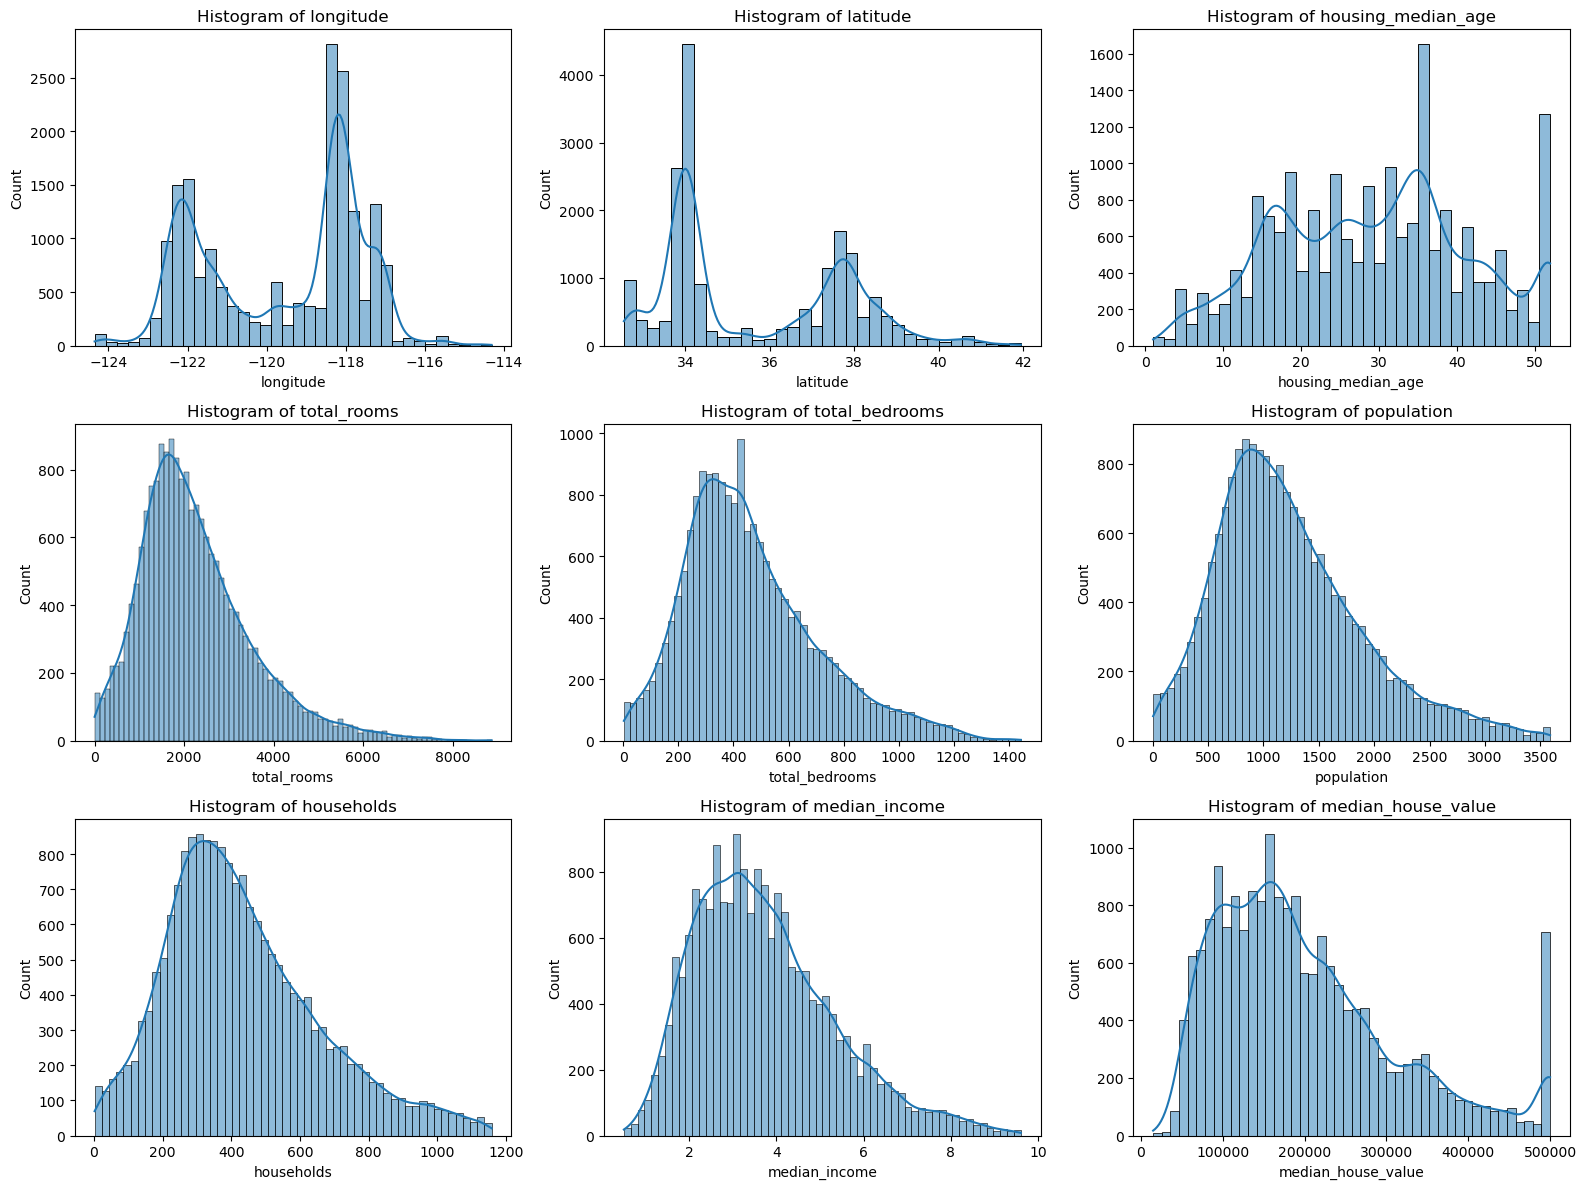

In [18]:
# Plot histograms for numerical columns to understand the distribution
numeric_columns = ['longitude', 'latitude', 'housing_median_age', 'total_rooms', 
                   'total_bedrooms', 'population', 'households', 'median_income', 'median_house_value']

plt.figure(figsize=(16, 12))
for i, column in enumerate(numeric_columns, 1):
    plt.subplot(3, 3, i)
    sns.histplot(df_cleaned[column], kde=True)
    plt.title(f'Histogram of {column}')

plt.tight_layout()
plt.show()

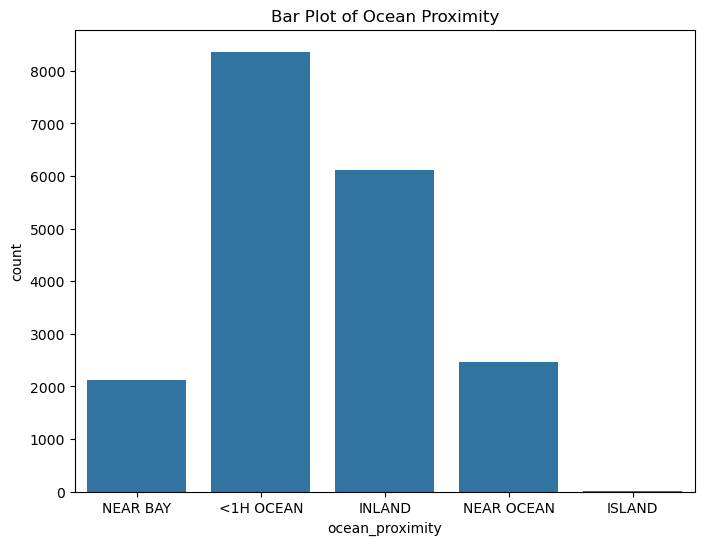

In [19]:
# Bar plot for categorical column 'ocean_proximity'
plt.figure(figsize=(8, 6))
sns.countplot(x='ocean_proximity', data=df_cleaned)
plt.title('Bar Plot of Ocean Proximity')
plt.show()

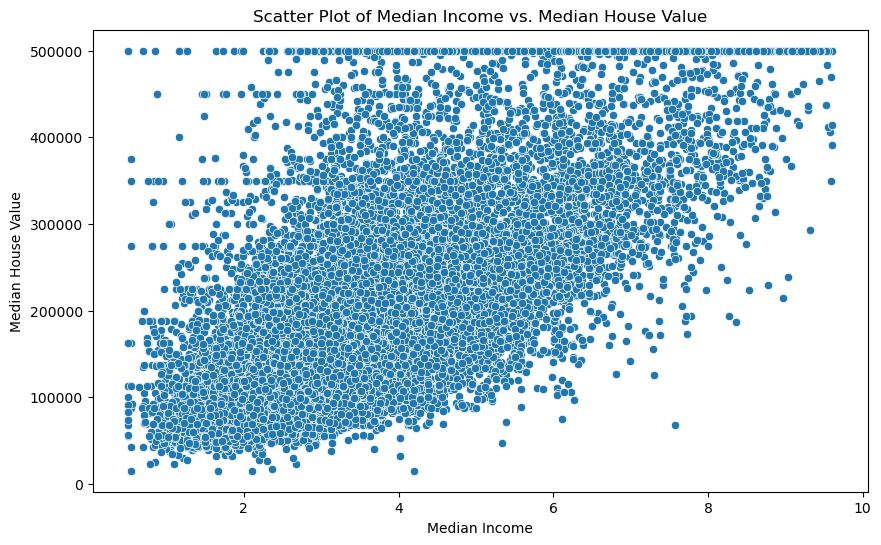

In [20]:
# Scatter plots to visualize relationships between key numerical variables
plt.figure(figsize=(10, 6))
sns.scatterplot(x='median_income', y='median_house_value', data=df_cleaned)
plt.title('Scatter Plot of Median Income vs. Median House Value')
plt.xlabel('Median Income')
plt.ylabel('Median House Value')
plt.show()

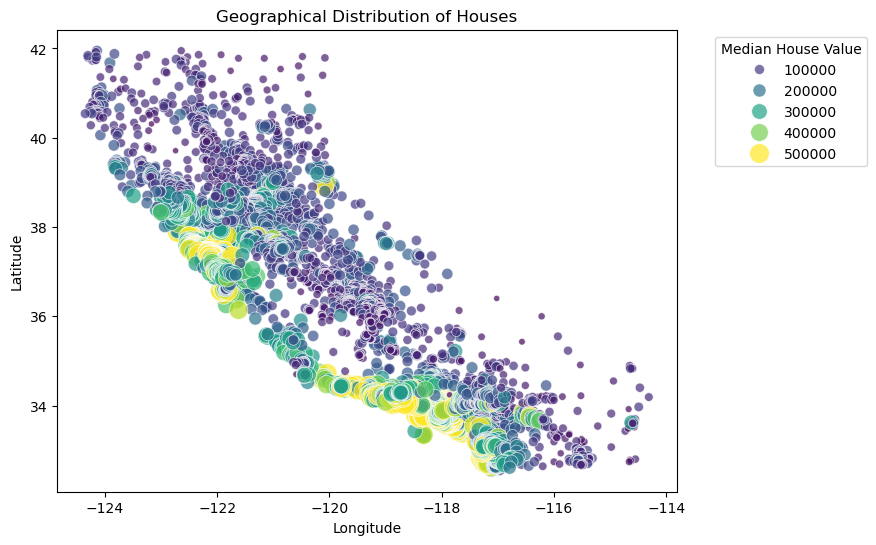

In [31]:
# Geographical Visualization: Longitude vs Latitude
plt.figure(figsize=(8, 6))
sns.scatterplot(x='longitude', y='latitude', hue='median_house_value', palette='viridis', size='median_house_value', sizes=(20, 200), data=df, alpha=0.7)
plt.title('Geographical Distribution of Houses')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend(title='Median House Value', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

<Figure size 1200x1000 with 0 Axes>

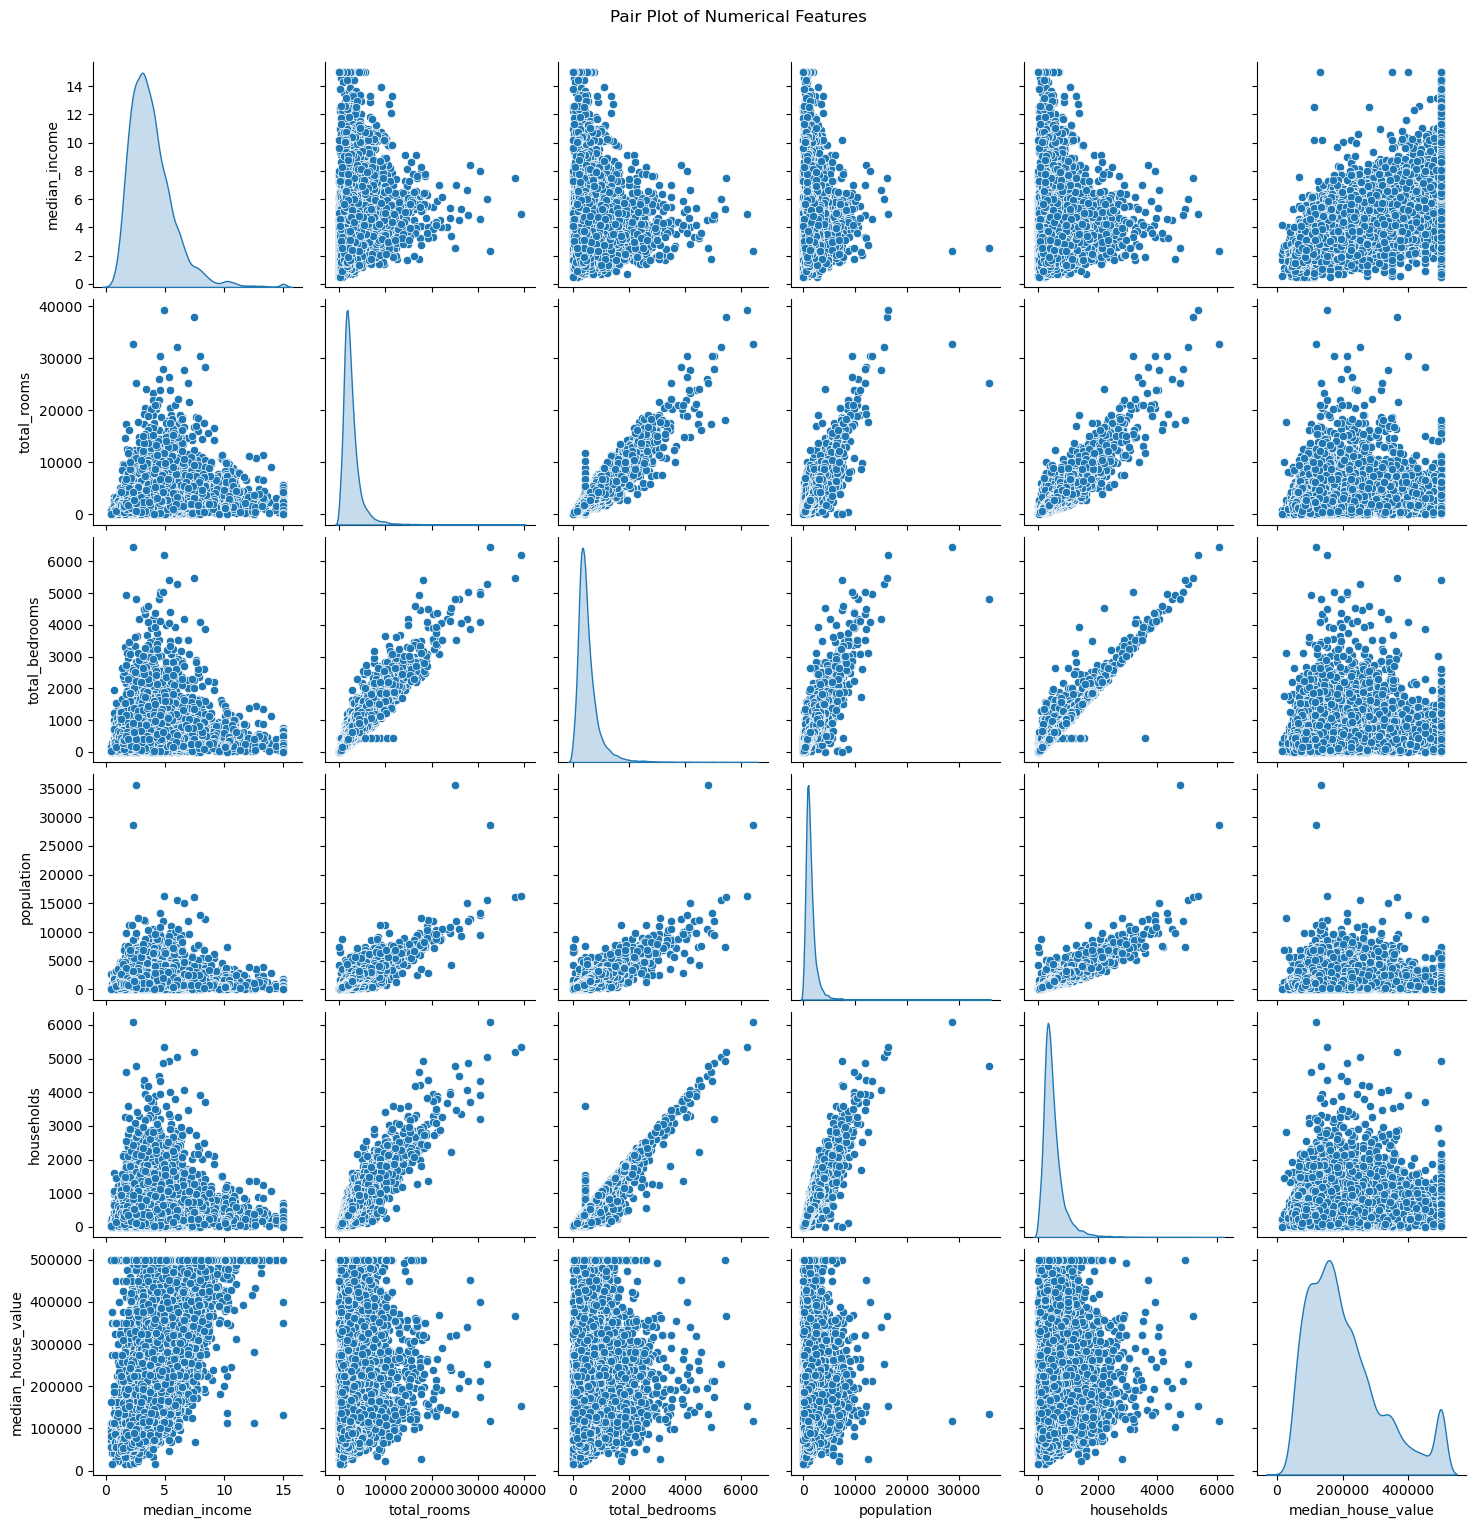

In [33]:
# Pair Plot to visualize relationships between numerical features
numerical_features = ['median_income', 'total_rooms', 'total_bedrooms', 'population', 'households', 'median_house_value']
plt.figure(figsize=(12, 10))
sns.pairplot(df[numerical_features], diag_kind='kde')
plt.suptitle('Pair Plot of Numerical Features', y=1.02)
plt.show()

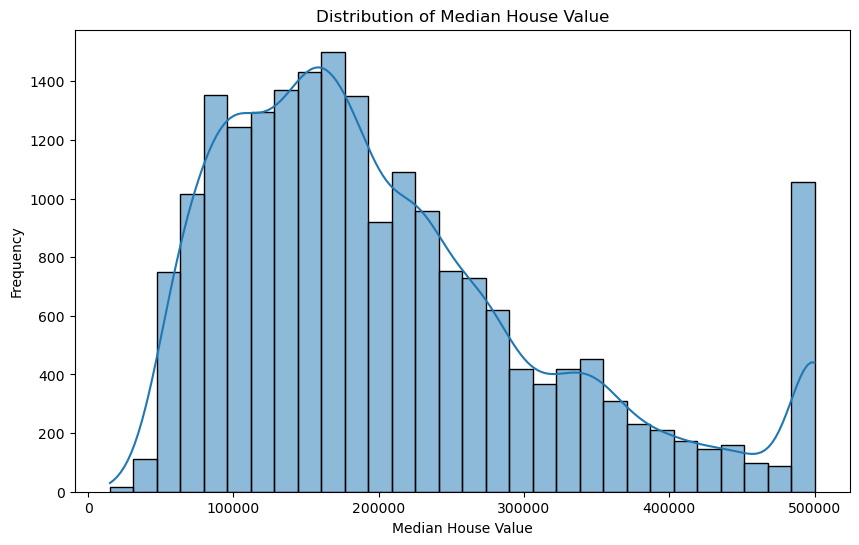

In [37]:
# Univariate Analysis
## Histogram of Median House Value
plt.figure(figsize=(10, 6))
sns.histplot(df['median_house_value'], kde=True, bins=30)
plt.title('Distribution of Median House Value')
plt.xlabel('Median House Value')
plt.ylabel('Frequency')
plt.show()


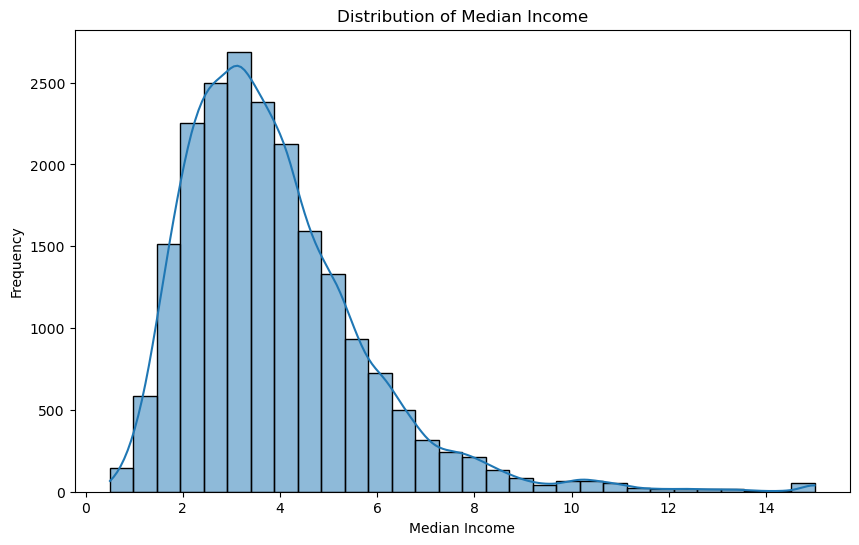

In [36]:
## Histogram of Median Income
plt.figure(figsize=(10, 6))
sns.histplot(df['median_income'], kde=True, bins=30)
plt.title('Distribution of Median Income')
plt.xlabel('Median Income')
plt.ylabel('Frequency')
plt.show()

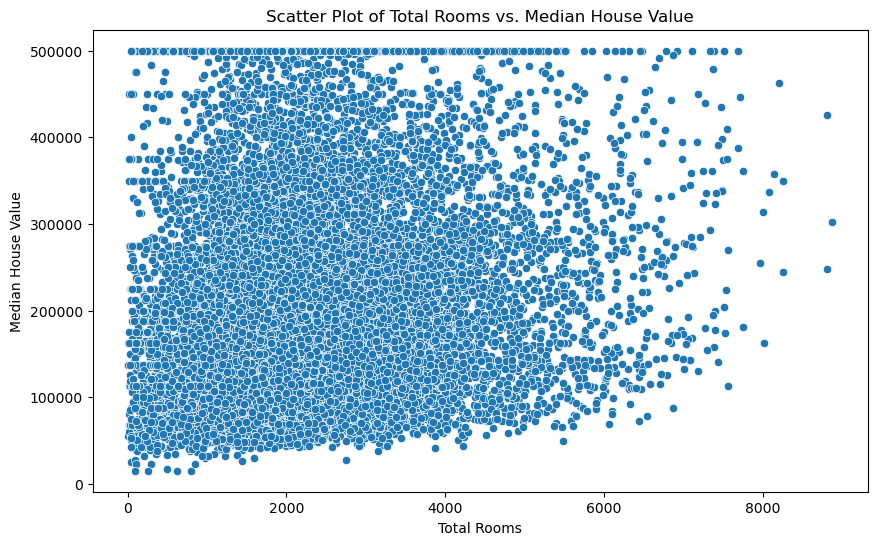

In [21]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='total_rooms', y='median_house_value', data=df_cleaned)
plt.title('Scatter Plot of Total Rooms vs. Median House Value')
plt.xlabel('Total Rooms')
plt.ylabel('Median House Value')
plt.show()

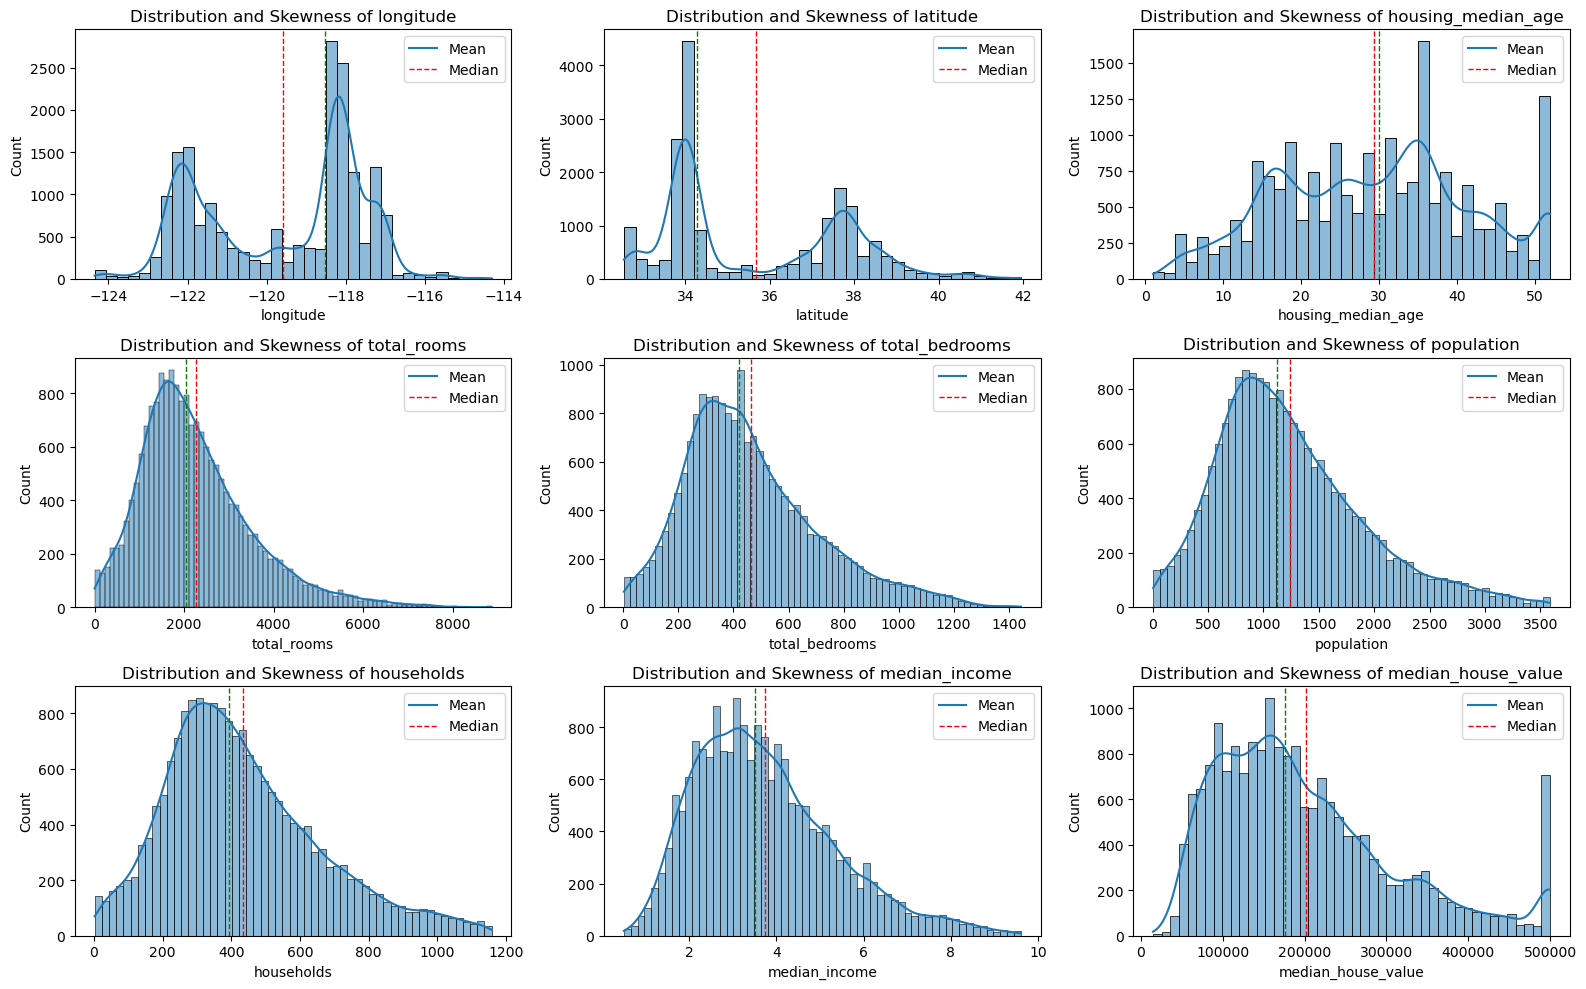

In [22]:
# 1. Distribution Plot with Skewness Annotations
plt.figure(figsize=(16, 10))
for i, column in enumerate(numeric_columns, 1):
    plt.subplot(3, 3, i)
    sns.histplot(df_cleaned[column], kde=True)
    plt.axvline(df_cleaned[column].mean(), color='red', linestyle='dashed', linewidth=1)
    plt.axvline(df_cleaned[column].median(), color='green', linestyle='dashed', linewidth=1)
    plt.title(f'Distribution and Skewness of {column}')
    plt.legend({'Mean': df_cleaned[column].mean(), 'Median': df_cleaned[column].median()})

plt.tight_layout()
plt.show()

In [40]:
from mpl_toolkits.mplot3d import Axes3D
!pip install geopandas
import geopandas as gpd
from shapely.geometry import Point

   ---------------------------------------- 0.0/323.6 kB ? eta -:--:--
   --- ------------------------------------ 30.7/323.6 kB 1.4 MB/s eta 0:00:01
   ---- ---------------------------------- 41.0/323.6 kB 991.0 kB/s eta 0:00:01
   ---- ---------------------------------- 41.0/323.6 kB 991.0 kB/s eta 0:00:01
   ---- ---------------------------------- 41.0/323.6 kB 991.0 kB/s eta 0:00:01
   -------- ------------------------------ 71.7/323.6 kB 302.7 kB/s eta 0:00:01
   -------- ------------------------------ 71.7/323.6 kB 302.7 kB/s eta 0:00:01
   ----------- --------------------------- 92.2/323.6 kB 309.1 kB/s eta 0:00:01
   ----------- --------------------------- 92.2/323.6 kB 309.1 kB/s eta 0:00:01
   --------------------- ---------------- 184.3/323.6 kB 446.4 kB/s eta 0:00:01
   --------------------- ---------------- 184.3/323.6 kB 446.4 kB/s eta 0:00:01
   -------------------------- ----------- 225.3/323.6 kB 459.5 kB/s eta 0:00:01
   -------------------------- ----------- 225.3/32

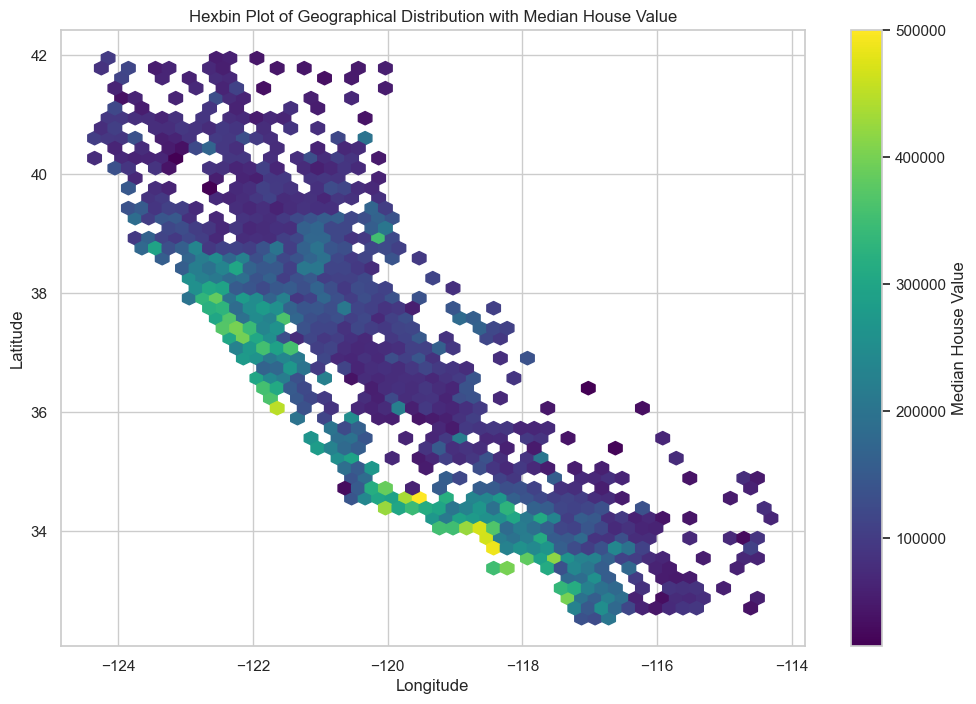

In [41]:
# Set the aesthetic style of the plots
sns.set(style='whitegrid')

# 1. Hexbin Plot for Geographical Distribution
plt.figure(figsize=(12, 8))
plt.hexbin(df['longitude'], df['latitude'], C=df['median_house_value'], gridsize=50, cmap='viridis', reduce_C_function=np.mean)
plt.colorbar(label='Median House Value')
plt.title('Hexbin Plot of Geographical Distribution with Median House Value')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

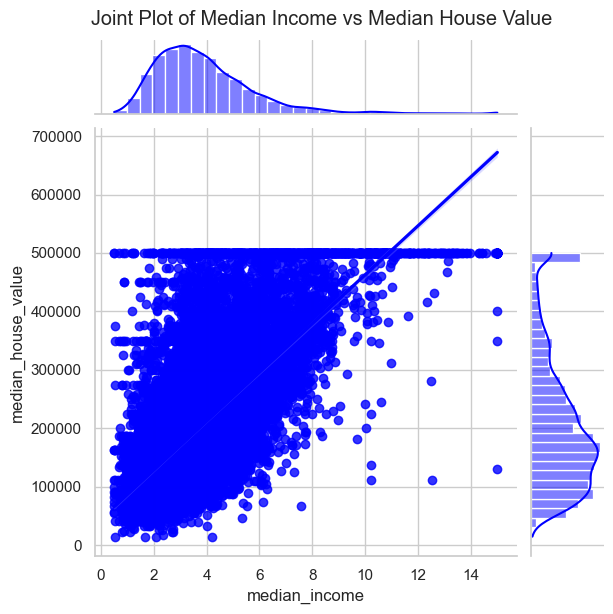

In [42]:
# 4. Joint Plot with Marginal Histograms
sns.jointplot(x='median_income', y='median_house_value', data=df, kind='reg', color='blue', marginal_kws=dict(bins=30, fill=True))
plt.suptitle('Joint Plot of Median Income vs Median House Value', y=1.02)
plt.show()

In [23]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [24]:
# Define features and target
X = df_cleaned.drop(['median_house_value', 'ocean_proximity'], axis=1)  # Exclude target and non-numeric columns
y = df_cleaned['median_house_value']

In [25]:
# Encode categorical features if necessary
X = pd.get_dummies(X, drop_first=True)  # Convert categorical features to numerical

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [26]:
# Initialize models
models = {
    'Linear Regression': LinearRegression(),
    'Random Forest Regressor': RandomForestRegressor(n_estimators=100, random_state=42),
    'Gradient Boosting Regressor': GradientBoostingRegressor(n_estimators=100, random_state=42)
}


In [27]:
# Train models and evaluate
results = {}
for model_name, model in models.items():
    # Train the model
    model.fit(X_train, y_train)
    
    # Make predictions
    y_pred = model.predict(X_test)
    
    # Evaluate the model
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    # Store the results
    results[model_name] = {'MAE': mae, 'MSE': mse, 'R2': r2}
    
    # Print the results
    print(f"\n{model_name} Performance:")
    print(f"Mean Absolute Error (MAE): {mae:.2f}")
    print(f"Mean Squared Error (MSE): {mse:.2f}")
    print(f"R² Score: {r2:.2f}")



Linear Regression Performance:
Mean Absolute Error (MAE): 50191.37
Mean Squared Error (MSE): 4542940578.84
R² Score: 0.63

Random Forest Regressor Performance:
Mean Absolute Error (MAE): 32589.59
Mean Squared Error (MSE): 2450928245.67
R² Score: 0.80

Gradient Boosting Regressor Performance:
Mean Absolute Error (MAE): 37894.89
Mean Squared Error (MSE): 2972837585.10
R² Score: 0.76


# Model Performance Summary

## Linear Regression Performance

- **Mean Absolute Error (MAE)**: 50,191.37
  - **Description**: MAE measures the average magnitude of errors in a set of predictions, without considering their direction. It represents the average absolute difference between the predicted values and the actual values. A lower MAE indicates better model performance.
  
- **Mean Squared Error (MSE)**: 4,542,940,578.84
  - **Description**: MSE measures the average of the squares of the errors—that is, the average squared difference between the predicted values and the actual values. Like MAE, a lower MSE indicates better performance, but MSE penalizes larger errors more heavily due to the squaring term.

- **R² Score**: 0.63
  - **Description**: The R² score (coefficient of determination) indicates the proportion of the variance in the dependent variable that is predictable from the independent variables. An R² score of 0.63 suggests that 63% of the variance in the target variable is explained by the linear regression model.

## Random Forest Regressor Performance

- **Mean Absolute Error (MAE)**: 32,589.59
  - **Description**: MAE for the Random Forest Regressor is lower than that of the Linear Regression model, indicating that the Random Forest model's predictions are closer to the actual values on average.

- **Mean Squared Error (MSE)**: 2,450,928,245.67
  - **Description**: The MSE for the Random Forest model is also lower compared to the Linear Regression model, suggesting that the Random Forest model has fewer large errors.

- **R² Score**: 0.80
  - **Description**: The R² score of 0.80 for the Random Forest model indicates that 80% of the variance in the target variable is explained by the model. This is a higher value compared to the Linear Regression model, reflecting better performance.

## Gradient Boosting Regressor Performance

- **Mean Absolute Error (MAE)**: 37,894.89
  - **Description**: The MAE for the Gradient Boosting Regressor is higher than that of the Random Forest model but lower than that of the Linear Regression model. This suggests that the Gradient Boosting model performs reasonably well in terms of average prediction error.

- **Mean Squared Error (MSE)**: 2,972,837,585.10
  - **Description**: The MSE for the Gradient Boosting model is higher compared to the Random Forest model, indicating that it has slightly more large errors in predictions.

- **R² Score**: 0.76
  - **Description**: The R² score of 0.76 indicates that the Gradient Boosting model explains 76% of the variance in the target variable. This is between the scores of the Linear Regression and Random Forest models, suggesting a moderately good fit.

## Summary

- The **Random Forest Regressor** demonstrates the best performance among the models, with the lowest MAE and MSE and the highest R² score.
- The **Gradient Boosting Regressor** also performs well, but with slightly higher errors and a lower R² score compared to the Random Forest model.
- The **Linear Regression** model, while simpler, has the highest errors and the lowest R² score, indicating it is less effective compared to the other models for this dataset.


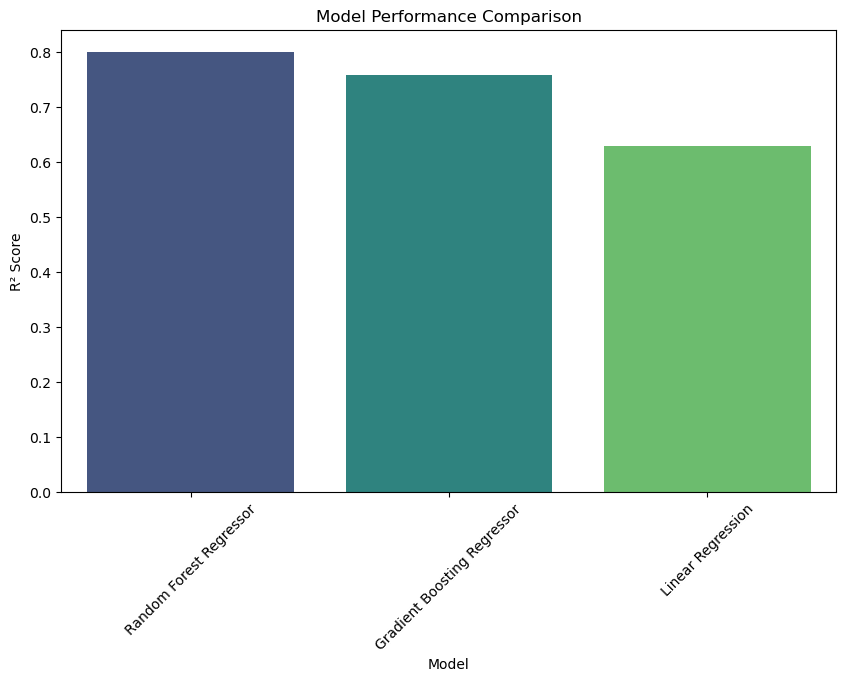

In [28]:
# Create a DataFrame for results
results_df = pd.DataFrame(results).T
results_df.sort_values(by='R2', ascending=False, inplace=True)

# Plot the results
plt.figure(figsize=(10, 6))
sns.barplot(x=results_df.index, y=results_df['R2'], palette='viridis')
plt.title('Model Performance Comparison')
plt.xlabel('Model')
plt.ylabel('R² Score')
plt.xticks(rotation=45)
plt.show()